# Assignment 3

*Part of the course:
Machine Learning (code: INFOB3ML), fall 2021, Utrecht University*

Total points: 9 (+ 1 for free)

Submit one ipynb file per pair.

**Before you submit, click Kernel > Restart & Run All to make sure you submit a working version of your code!**

## General
This is a largely freeform project, where you will implement and use several machine learning methods you've seen during this course, and write a report on your results.

In [108]:
import math
import random
import numpy as np
from statistics import mean
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

## Implement K-means

**Task:** *(2 points)* Complete the function below to carry out the K-means clustering algorithm.

The function takes two arguments:

* A data matrix `X`. Your function should be able to handle any number of data points (rows) and any number of real-valued features (columns);

* The number of clusters `K`.

The function should return two things:

* A numpy array `mu` with the cluster centroids. It should have `K` rows, each describing of the `K` clusters, and a number of columns equal to the number of features;

* A list (or numpy array if you prefer) `assigned_to`, containing one element for each data point. The value of the element is the index of the cluster that data point is assigned to. The indices should correspond to those of the rows of `mu`, so they should be between `0` and `K-1`.

There are different ways to initialise the algorithm, and you can pick one you like. This step should involve some randomness, so that if you run the algorithm repeatedly, you have a chance of getting a different clustering every time.

In [2]:
def K_means(X, K):
    mu = []
    assigned_to = []
    old_centroids = []

    random_centroids = random.sample(range(X.shape[0]), K)
    for i in random_centroids:
        mu.append(X[i])
    for i in range(len(X)):
        assigned_to.append(math.inf)
    
    while(True):
        data= []
        centroids = []

        for i in range (K):
            data.append([])    

        for index in range(len(X)):
            distance = math.inf
            closest_centroid = math.inf
            for centroid_index in range(len(mu)):
                distance_temp = Euclidean_distance(mu[centroid_index], X[index])
                if (distance_temp < distance):
                    distance = distance_temp
                    closest_centroid = centroid_index
                assigned_to[index] = closest_centroid
                data[closest_centroid].append(X[index])

        for centroid in data:
            average = [sum(x)/len(x) for x in zip(*centroid)]
            centroids.append(average)
        
        if(centroids == old_centroids):
            break
        
        mu = centroids
        old_centroids = centroids      
    
    return mu, assigned_to


def Euclidean_distance(point1, point2):
    return distance.euclidean(point1, point2)

To test if your function is working well, you can run it on the following simulated data.

In [122]:
X_simulated = np.random.normal(0, 1, (100, 2))
X_simulated[50:,:] += [1, 3] # Move points 50 through 99 to be centred on (1,3).
mu, lijst = K_means(X_simulated, 3)
print("mu: ", mu, "\nassigned to: ", lijst)

mu:  [[0.3966211109588324, 0.9462807901697117], [1.1235464811631282, 3.433277092224547], [-0.11109517706533507, -0.6718891434598546]] 
assigned to:  [2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1]


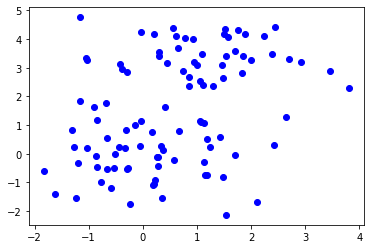

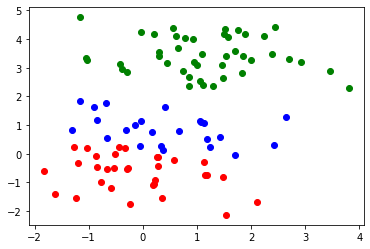

In [123]:
plt.figure(0)
for points in X_simulated:
    plt.plot(points[0], points[1], 'bo')
def PlotPointsClassification(X, Assigned):
    #plot up to 7 clusters with different colors
    plt.figure(1)
    for points in range(len(X)):
        colors = ['bo', 'go', 'ro', 'co', 'mo', 'yo', 'ko']
        clr_indx = Assigned[points]
        plt.plot(X[points][0], X[points][1], colors[clr_indx])

PlotPointsClassification(X_simulated, lijst)

## Data preprocessing

**Task: Pick a dataset.** *(1 point)* Find a dataset that you find interesting to analyse. Some properties:

* It should be a supervised learning problem, either regression or classification (in other words: there should be some label that must be predicted based on features, and this label can be real-valued or discrete);

* It shouldn't be too big, so the computation times don't become annoying;

* It should have say 5~10 numeric features. A feature is called "numeric" if its values really represent numbers. Sometimes non-numeric information is encoded as numbers (e.g., yes=1, no=2, not sure=3). Then doing things like computing differences or averages of those numbers doesn't really mean anything. So such features are not considered numeric. (If your data also has non-numeric features, we'll ignore those.)

Example website with many data sets: http://archive.ics.uci.edu/ml/index.php

Write code to load your dataset from a file in the same folder as your notebook. (Include that file with your notebook when submitting your assignment.)

If your data includes non-numeric features, have your code remove those after loading.

In the text cell below, give a (very brief) description of the data: what is it about, what does the label mean and what are its possible values, how many numeric features does it have, what is the source of your data?

In [72]:
# Your code here
data = []
X_points = np.full((210, 7), 0.00)
labels = []

with open('seeds_dataset.txt') as data:
    data = data.readlines()

row = 0
for line in data:
    line.splitlines()
    column = 0    
    for index in range(len(line.split()) -1):
        X_points[row, column] = float(line.split()[index])
        column += 1
    row += 1
for line in data:
    line.splitlines()
    for index in range(len(line.split())):
        if(index == len(line.split()) - 1):
            labels.append(line.split()[index])

*Your description of the data here*
source: http://archive.ics.uci.edu/ml/datasets/seeds
We chose kernels for our classification problem. The kernels belong to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected. Thus making it have 3 labels, each for one of the varieties of wheat, it's values will be 0,1,2.

It has 7 numeric features, which are the geometric measures of the kernel;
1. Area A of the kernel
2. Perimeter P,
3. Compactness based on the formula C = 4*pi*A/P^2,
4. Length of kernel,
5. Width of kernel,
6. Asymmetry coefficient
7. Length of kernel groove.

In some datasets, the different features may represent completely different things, each measured in their own way. If one feature has very large values while another has only very small ones, this may have an impact on the results of certain machine learning algorithms. K-means for example measures distances between data points, but if one feature has values in the thousands and another has values between 0 and 1, the second feature would effectively end up being ignored. This is often undesirable. Some data preprocessing is the necessary to avoid this effect.

**Task: Normalise the dataset.** *(0.5 point)* Divide each numerical feature by its standard deviation. By doing this, each numeric feature in the normalised dataset will have variance 1. As a result, all features will now live in a comparable range, and all will play a role in distance computations.

In [8]:
def normalize(X_Points):
    total = 0
    total_len = 0
    squared_subtract = []
    average_squared_subtract = 0
    for features in X_points:
        total += sum(features)
        total_len += len(features)
    average = total / total_len
    for features in X_points:
        for feature in features:
            squared_subtract.append(math.pow((feature - average), 2))
    average_squared_subtract = sum(squared_subtract) / len(squared_subtract)
    sigma = math.sqrt(average_squared_subtract)
    for features_index in range(len(X_points)):
        for feature_index in range(len(features)):
            X_points[features_index][feature_index] = X_points[features_index][feature_index] / sigma
    
    return X_points
    


## Explore your data using unsupervised learning

Your goal with the data is to solve a supervised learning problem. But unsupervised learning can be a useful first step: it can help to give you a better idea of what the data "looks like", and it can help to select relevant features for use in a later supervised learning step.

In these steps, only use the features, not the label.

**Task: Explore the data using K-means.** *(1.5 points)* Try out a range of values for `K`. Make a plot similar to the one in Figure 6.3 in the book. The discuss the question: what seems to be a reasonable number of clusters for your data?

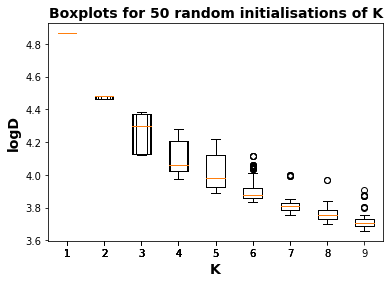

In [9]:
normalized_set = normalize(X_points)

def Calculate_log_D(norm, centr, a_t):
    distance = 0.0
    for point_index in range(len(norm)):
        centr_index = a_t[point_index]
        distance += Euclidean_distance(norm[point_index], centr[centr_index])
    return math.log(distance)


def Plot_Figure(norm):
    fig = plt.figure(2)
    ax = fig.add_subplot(111)
    log_d = []
    for k in range(1, 10):
        log_d.append([])
        for itterations in range (50):
            new_centroids, new_assigned_to = K_means(norm, k)
            log_d[len(log_d) - 1].append(Calculate_log_D(norm, new_centroids, new_assigned_to))
        ax.boxplot(log_d)
    ax.set_title("Boxplots for 50 random initialisations of K", fontsize=14, fontweight='bold')
    ax.set_xlabel("K", fontsize=14, fontweight='bold')
    ax.set_ylabel("logD", fontsize=14, fontweight='bold')

Plot_Figure(normalized_set) #running this function can take a minute or 2.


After running 50 iterations for 9 different K's we get the following boxplot. We can see that from 4 clusters onwards we have quite a lot of outliers, which could mean that when we take a K of 4 and onwards for example, we'd see that the logD of the points to the centroids become smaller and smaller. Meaning we are overfitting as K increases. As K increases, large clusters will be broken down into smaller and smaller parts, the smaller each cluster, the closer each point will get (on average) to its cluster mean, reducing its contribution to D.

When we look at K=1 and K=2 we can still see that we have quite a high logD. This means that we are underfitting the data and we lose valuable information. So these options do not seem like good choices for us.

When we have K=3 we look to be generalizen just the right amount. So based on this graph we would think K=3 would be a reasonable number of clusters for our data. When we look at the botplox, the 25th and 75th percentiles show promising values.

However, recall that K-means produces a clustering that corresponds to a local minumum of logD. unfortunately this method would be a poor selection criterion. So when we look at which K looks promissing we cannot disregard other K's. It makes sense to choose the number of clusters that produces the best recommendations, perhaps on some validation data as said in the book.

**Task: Visualise the data using PCA.** *(1 point)* You don't need to implement PCA yourself, you can use a package for this like `sklearn.decomposition.PCA`. Run PCA with 2 components, so that you get a 2-dimensional "summary" of your data. Plot this version of your data.

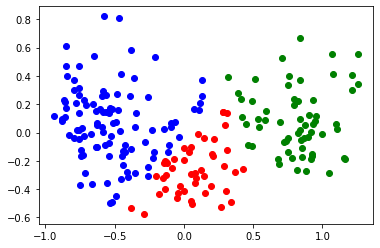

In [10]:
normalized_set = normalize(X_points)
centroids, assigned_to = K_means(normalized_set, 3)

pca = PCA(n_components = 2)
pca.fit(normalized_set)
x_pca = pca.transform(normalized_set)
x_pca.shape
plt.figure(3)
colors = ['bo', 'go', 'ro', 'co', 'mo', 'yo', 'ko']

for point_index in range(len(x_pca)):
    clr_indx = assigned_to[point_index]
    plt.plot(x_pca[point_index][0], x_pca[point_index][1], colors[clr_indx])

## Supervised learning

**Task: Train and compare supervised learning methods.** *(3 points)* For the final part of this assignment, you'll try two different regression or classification methods on your dataset. You don't need to implement these yourself, you can use existing packages. You should also experiment with different settings of those methods, like how many features they get to see, or what the value of a regularisation parameter is. Your goal is to select a method that you believe will give the best results where more data from the same source come in.

Write a report on your findings.

In your report, you should specifically pay attention to the following:

* Which two supervised learning methods will you use? Why did you pick these two? (You can pick a method that hasn't been discussed (yet) during the course, if you want.)

* When comparing the performance of different alternatives, keep in mind that the error on training data is not a good estimate of the error on unseen data. To get a measure for the latter, you can for example use a form of cross-validation.

* What method and settings do you recommend? What choices (of method, of various settings) make the biggest difference for the performance on new data?

In [111]:
test_set = []
test_set_labels = []
training_set = []
training_set_labels = []

for indexes in range(len(normalized_set)):
    if (indexes % 10 == 0):
        test_set.append(normalized_set[indexes])
        test_set_labels.append(labels[indexes])
    else:
        training_set.append(normalized_set[indexes])
        training_set_labels.append(labels[indexes])

In [96]:
def KNN(X, assigned, to_predict):
    predictions = []
    neigh = NearestNeighbors(n_neighbors=3)
    neigh.fit(X)
    indexes = neigh.kneighbors(to_predict)[1]
    for index in indexes:
        predictions.append(assigned[index[0]])
    return predictions

knn_result = KNN(training_set, training_set_labels, test_set)
print("Result of our K nearest neighbours: ", knn_result)
print("The actual labels of these data points: ", test_set_labels)

correct = 0

for indexes in range(len(knn_result)):
    if(knn_result[indexes] == test_set_labels[indexes]):
        correct += 1

print(correct / len(knn_result) * 100, "% is being correctly classified by our K nearest neighbours")

Result of our K nearest neighbours:  ['1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3']
The actual labels of these data points:  ['1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3']
100.0 % is being correctly classified by our K nearest neighbours


In [110]:
def NNM(X, labels, to_predict):
    clf = MLPClassifier(solver='lbfgs')
    clf.fit(X, labels)
    return clf.predict(to_predict)

nnm_result = NNM(training_set, training_set_labels, test_set)
print("Result of our Neural Network Model: ", nnm_result)
print("The actual labels of these data points: ", test_set_labels)

correct = 0

for indexes in range(len(nnm_result)):
    if(nnm_result[indexes] == test_set_labels[indexes]):
        correct += 1

print(correct / len(nnm_result) * 100, "% is being correctly classified by our Neural Network Model")

Result of our Neural Network Model:  ['1' '1' '1' '1' '1' '1' '1' '2' '2' '2' '2' '2' '2' '2' '3' '3' '3' '3'
 '3' '3' '3']
The actual labels of these data points:  ['1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3']
100.0 % is being correctly classified by our Neural Network Model


Which two supervised learning methods will you use? Why did you pick these two? (You can pick a method that hasn't been discussed (yet) during the course, if you want.)

* For our two supervised learning methods we chose K-nearest neighbours and a Neural Network Model. First of all we chose K-  nearest neighbours because we thought on a conceptual level K-nearest neighbours and K-means clustering are somewhat similar. Ofcourse these two are completely different in tasks, since K-means clustering represents an unsupervised algorithm, mainly used for clustering, while KNN is a supervised learning algorithm used for classification.                                      We also implemented a Neural Network Model to classify our testing data. We chose the Neural Network Model since we haven't really implemented Neural Networks yet in this class, and the dataset we had looked to be suitable for such a model, apart from not being the biggest dataset.

When comparing the performance of different alternatives, keep in mind that the error on training data is not a good estimate of the error on unseen data. To get a measure for the latter, you can for example use a form of cross-validation.

* To cross validate we split our dataset in a training set (189 points, 90% of the data) and a test set (21 points, 10% of the data). Since our data was sorted on labels we made sure that both our sets contained all possible labels. This ofcourse doesn't 100% represent real world scenarios in which the to be predicted data can only contain 1 label. We chose for this approach since we didn't only wanted to test our algorithms on 1 label and disregard how it classified other labels.

What method and settings do you recommend? What choices (of method, of various settings) make the biggest difference for the performance on new data?

* First of all let's start with our K-nearest neighbours. For this algorithm we choose to pick the paramater "n_neighbors=3". We had most succes in classifying. With this paramater it looks like that we are neither underfitting nor overfitting, since we score a 100% on our data. Also on a more conceptual level picking the 3 nearest neighbours looks to be a good idea, since we don't have too many data points                                                                                                  For our Neural Network Model we had the choice between 3 solvers. L-BFGS, Adam and SGD we tried all those solvers and we concluded that L-BFGS would be the most optimal solver for our problem. This is exactly in line with the scikit documentation which also empirically observed that L-BFGS converges fast and has better solutions for smaller data sets.

    
---

<br>
<br>

**Remember:**

* **Before you submit, click Kernel > Restart & Run All to make sure you submit a working version of your code!**

* **Upload both this notebook and your data file in Blackboard**